# Tarefa 02

- Leia os enunciados com atenção
- Saiba que pode haver mais de uma resposta correta
- Insira novas células de código sempre que achar necessário
- Em caso de dúvidas, procure os monitores
- Divirta-se :)

#### 1. Carregue os dados da tarefa anterior

In [1]:
from pandas_datareader import data as pdr
import yfinance as yf
import plotly.express as px
from plotly import graph_objects
from plotly.graph_objs import Layout

import pandas as pd
import numpy as np

In [2]:
ativos =['PETR4.SA', 'ABEV3.SA', 'VALE3.SA']
dt_ini, dt_fim = '2023-01-01', '2023-11-30'

yf.pdr_override()
yf = pdr.get_data_yahoo(ativos, start=dt_ini, end=dt_fim)
yf.head()

[*********************100%%**********************]  3 of 3 completed


Adj Close                          Close                        \
            ABEV3.SA   PETR4.SA   VALE3.SA ABEV3.SA   PETR4.SA   VALE3.SA   
Date                                                                        
2023-01-02     14.19  17.760122  84.082291    14.19  22.920000  89.400002   
2023-01-03     14.17  17.310694  83.931808    14.17  22.340000  89.239998   
2023-01-04     14.25  17.860853  84.082291    14.25  23.049999  89.400002   
2023-01-05     14.29  18.504000  85.493065    14.29  23.879999  90.900002   
2023-01-06     14.32  18.395517  86.847412    14.32  23.740000  92.339996   

               High                            Low                        \
           ABEV3.SA   PETR4.SA   VALE3.SA ABEV3.SA   PETR4.SA   VALE3.SA   
Date                                                                       
2023-01-02    14.45  23.809999  89.900002    14.02  22.799999  88.529999   
2023-01-03    14.39  23.100000  90.089996    14.11  22.129999  88.889999   
2023-01-04    14.47  23.590000  89.650002    14.08  21.830000  87.949997   
2023-01-05    14.41  24.040001  91.680000    14.14  23.150000  89.000000   
2023-01-06    14.36  24.320000  92.739998    14.16  23.549999  91.000000   

               Open                          Volume                       
           ABEV3.SA   PETR4.SA   VALE3.SA  ABEV3.SA   PETR4.SA  VALE3.SA  
Date                                                                      
2023-01-02    14.40  23.540001  88.680000  14995900   78424700  12783800  
2023-01-03    14.16  22.940001  89.400002  36363800   96750300  25332600  
2023-01-04    14.28  21.959999  89.300003  23791800  129504000  26395300  
2023-01-05    14.27  23.340000  89.459999  31031500   73886000  29085600  
2023-01-06    14.30  23.940001  91.000000  20889800   51851500  31420600

#### 2. Média móvel

1. Faça uma média móvel  em 90 dias dos valores de fechamento ajustados dos ativos que você escolheu
2. Utilizando a fução ```rolling()```, calcule o desvio pardão desses ativos ao longo do tempo, utilizando a mesma janela móvel do item acima
2. Monte um gráfico de linhas para as médias móveis dos ativos da sua base
4. Monte um gráfico de linhas para os desvios padrão em janela móvel
5. Compare os dois gráficos que você fez com o da tarefa anterior. Veja se eles apontam conclusões semelhantes quanto aos períodos de maior volatilidade (variação) dos ativos.

In [3]:
# Faça uma média móvel em 90 dias dos valores de fechamento ajustados dos ativos que você escolheu
yf['Adj Close'].rolling(90).mean()


,ABEV3.SA,PETR4.SA,VALE3.SA
Date,,,
2023-01-02,NaN,NaN,NaN
2023-01-03,NaN,NaN,NaN
2023-01-04,NaN,NaN,NaN
2023-01-05,NaN,NaN,NaN
2023-01-06,NaN,NaN,NaN
...,...,...,...
2023-11-23,13.729111,31.806744,66.439905
2023-11-24,13.713222,31.899830,66.534732
2023-11-27,13.701111,31.992343,66.629263


In [4]:
# Utilizando a fução rolling(), calcule o desvio pardão desses ativos ao longo do tempo, utilizando a mesma janela móvel do item acima
yf['Adj Close'].rolling(90).std()

,ABEV3.SA,PETR4.SA,VALE3.SA
Date,,,
2023-01-02,NaN,NaN,NaN
2023-01-03,NaN,NaN,NaN
2023-01-04,NaN,NaN,NaN
2023-01-05,NaN,NaN,NaN
2023-01-06,NaN,NaN,NaN
...,...,...,...
2023-11-23,0.764110,2.723848,3.477934
2023-11-24,0.755996,2.697031,3.559566
2023-11-27,0.749196,2.660741,3.625400


<Axes: xlabel='Date'>

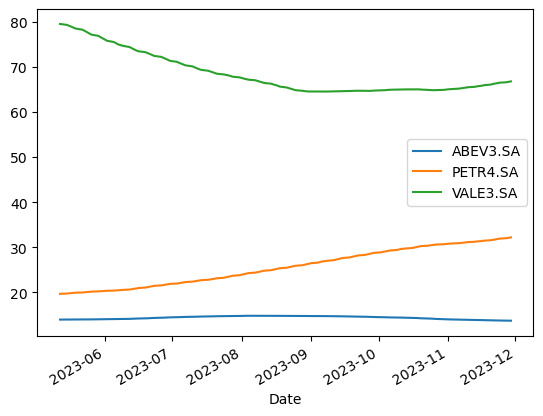

In [5]:
# Monte um gráfico de linhas para as médias móveis dos ativos da sua base
yf['Adj Close'].rolling(90).mean().plot()

<Axes: xlabel='Date'>

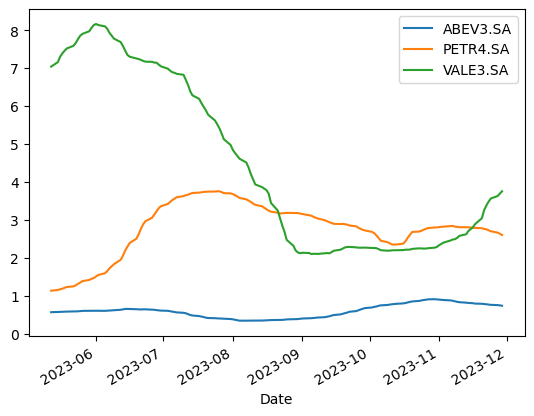

In [6]:
# Monte um gráfico de linhas para os desvios padrão em janela móvel
yf['Adj Close'].rolling(90).std().plot()

Compare os dois gráficos que você fez com o da tarefa anterior. Veja se eles apontam conclusões semelhantes quanto aos períodos de maior volatilidade (variação) dos ativos.
- Sim, os gráficos apontam conclusões semelhantes quanto aos períodos de maior volatilidade (variação) dos ativos, apesar do gráfico média ser mais suave, ele acompanha o gráfico de desvio padrão

#### 3. Gráfico de *candlestick*
1. Selecione o período dos últimos 60 dias (corridos) para um dos ativos da sua base
2. Monte um gráfico de *candlestick* para esses dados.

In [7]:
# Selecione o período dos últimos 60 dias (corridos) para um dos ativos da sua base
yf_60 = pdr.get_data_yahoo('PETR4.SA', start='2023-01-01', end='2023-03-31')

[*********************100%%**********************]  1 of 1 completed


In [11]:
# Monte um gráfico de candlestick para esses dados.
layout = Layout(
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)'
)

fig = graph_objects.Figure(data=[graph_objects.Candlestick(x=yf_60.index,
                                                           open=yf_60['Open'],
                                                           high=yf_60['High'],
                                                           low=yf_60['Low'],
                                                           close=yf_60['Close'],
                                                           showlegend=True)],
                           layout_title="Índice Bovespa",
                           layout=layout)

fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightGrey')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightGrey')
fig.show()

